In [4]:
import numpy as  np
import pandas as pd
import seaborn as sns
from new_heatmap import multi_group_heatmap
import matplotlib.pyplot as plt

import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch

In [42]:


a0 = np.arange(0,1, 1/600).reshape(30,20)
a1 = np.arange(0,1, 1/1200).reshape(30,40)



s0 = np.arange(0,1, 1/600).reshape(20,30).T
s1 = np.arange(0,1, 1/1200).reshape(40,30).T

ylabels = (np.arange(30)*10).astype(str)
x_label0 = (np.arange(20)).astype(int).astype(str)
x_label1 = (np.arange(40)).astype(int).astype(str)


val = np.random.rand(30,2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tu

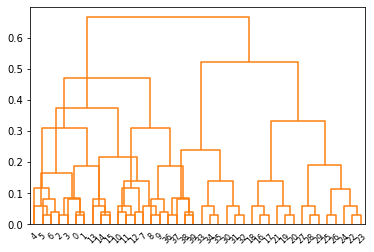

In [43]:
col_pairwise_dists_0 = distance.squareform(distance.pdist(a0.T))
col_pairwise_dists_1 = distance.squareform(distance.pdist(a1.T))
col_clusters_0 = sch.linkage(col_pairwise_dists_0,method='complete')
col_clusters_1 = sch.linkage(col_pairwise_dists_1,method='complete')
col_denD_0 = sch.dendrogram(col_clusters_0,color_threshold=np.inf)
col_denD_1 = sch.dendrogram(col_clusters_1,color_threshold=np.inf)

x_label0 = np.array(x_label0)[[col_denD_0['leaves']]]
x_label1 = np.array(x_label1)[[col_denD_1['leaves']]]
a0 = np.array(a0.T[col_denD_0['leaves'],:]).T
a1 = np.array(a1.T[col_denD_1['leaves'],:]).T

s0 = np.array(s0.T[col_denD_0['leaves'],:]).T
s1 = np.array(s1.T[col_denD_1['leaves'],:]).T

In [41]:
a0

array([[0.        , 0.00166667, 0.00333333, 0.005     , 0.00666667,
        0.00833333, 0.01      , 0.01166667, 0.01333333, 0.015     ,
        0.01666667, 0.01833333, 0.02      , 0.02166667, 0.02333333,
        0.025     , 0.02666667, 0.02833333, 0.03      , 0.03166667],
       [0.03333333, 0.035     , 0.03666667, 0.03833333, 0.04      ,
        0.04166667, 0.04333333, 0.045     , 0.04666667, 0.04833333,
        0.05      , 0.05166667, 0.05333333, 0.055     , 0.05666667,
        0.05833333, 0.06      , 0.06166667, 0.06333333, 0.065     ],
       [0.06666667, 0.06833333, 0.07      , 0.07166667, 0.07333333,
        0.075     , 0.07666667, 0.07833333, 0.08      , 0.08166667,
        0.08333333, 0.085     , 0.08666667, 0.08833333, 0.09      ,
        0.09166667, 0.09333333, 0.095     , 0.09666667, 0.09833333],
       [0.1       , 0.10166667, 0.10333333, 0.105     , 0.10666667,
        0.10833333, 0.11      , 0.11166667, 0.11333333, 0.115     ,
        0.11666667, 0.11833333, 0.12      , 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/fanyue/AMN_project/new_heatmap.py:271: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_clusters_0 = sch.linkage(col_pairwise_dists_0, method='complete')
/Users/fanyue/AMN_project/new_heatmap.py:272: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_clusters_1 = sch.linkage(col_pairwise_dists_1, method='complete')
/Users/fanyue/AMN_project/new_heatmap.py:490: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_cb = plt.subplot(plot_grid[1, 6])  # Use the rightmost column of the plot
/Users/fanyue/AMN_project/new_hea

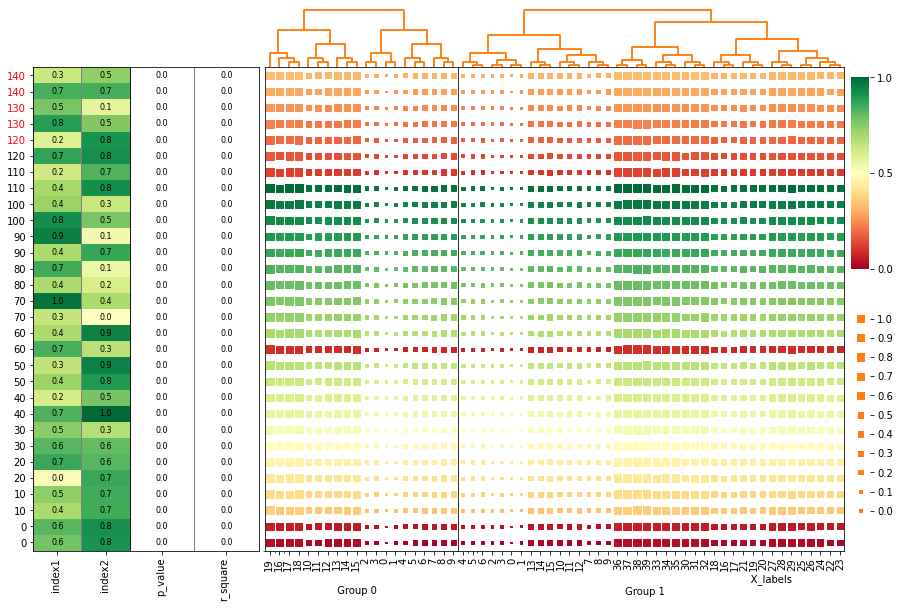

In [48]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2


fig0 = plt.figure(figsize=(15, 10))
multi_group_heatmap(
    index_group = val,
    index_group_x_ticks = ['index1', 'index2'],
    group0 = a0,
    group1 = a1,
    col_pairwise_dists_0 = col_pairwise_dists_0,
    col_pairwise_dists_1 = col_pairwise_dists_1,
    group0_x_ticks = x_label0,
    group1_x_ticks = x_label1,
    size0 = s0,
    size1 = s1,
    size_scale=60, # Change the overall cube size 

    x_axis_label ='                                                                             '+'X_labels',
    y_ticks = ylabels,
    color_range = [0,1],
    size_range = [0,1],
    chart = np.random.rand(30,2),
    chart_x_ticks = ['p_value','r_square'],
    palette=sns.color_palette("RdYlGn", 256),
    color_bar = True,
    size_bar = True,
    high_ligh_y_ticks = (0,5)
)